In [4]:
import pandas as pd
import numpy as np
import pdfplumber
import re
import os

## Scrape PDFs from 2009 to 2014

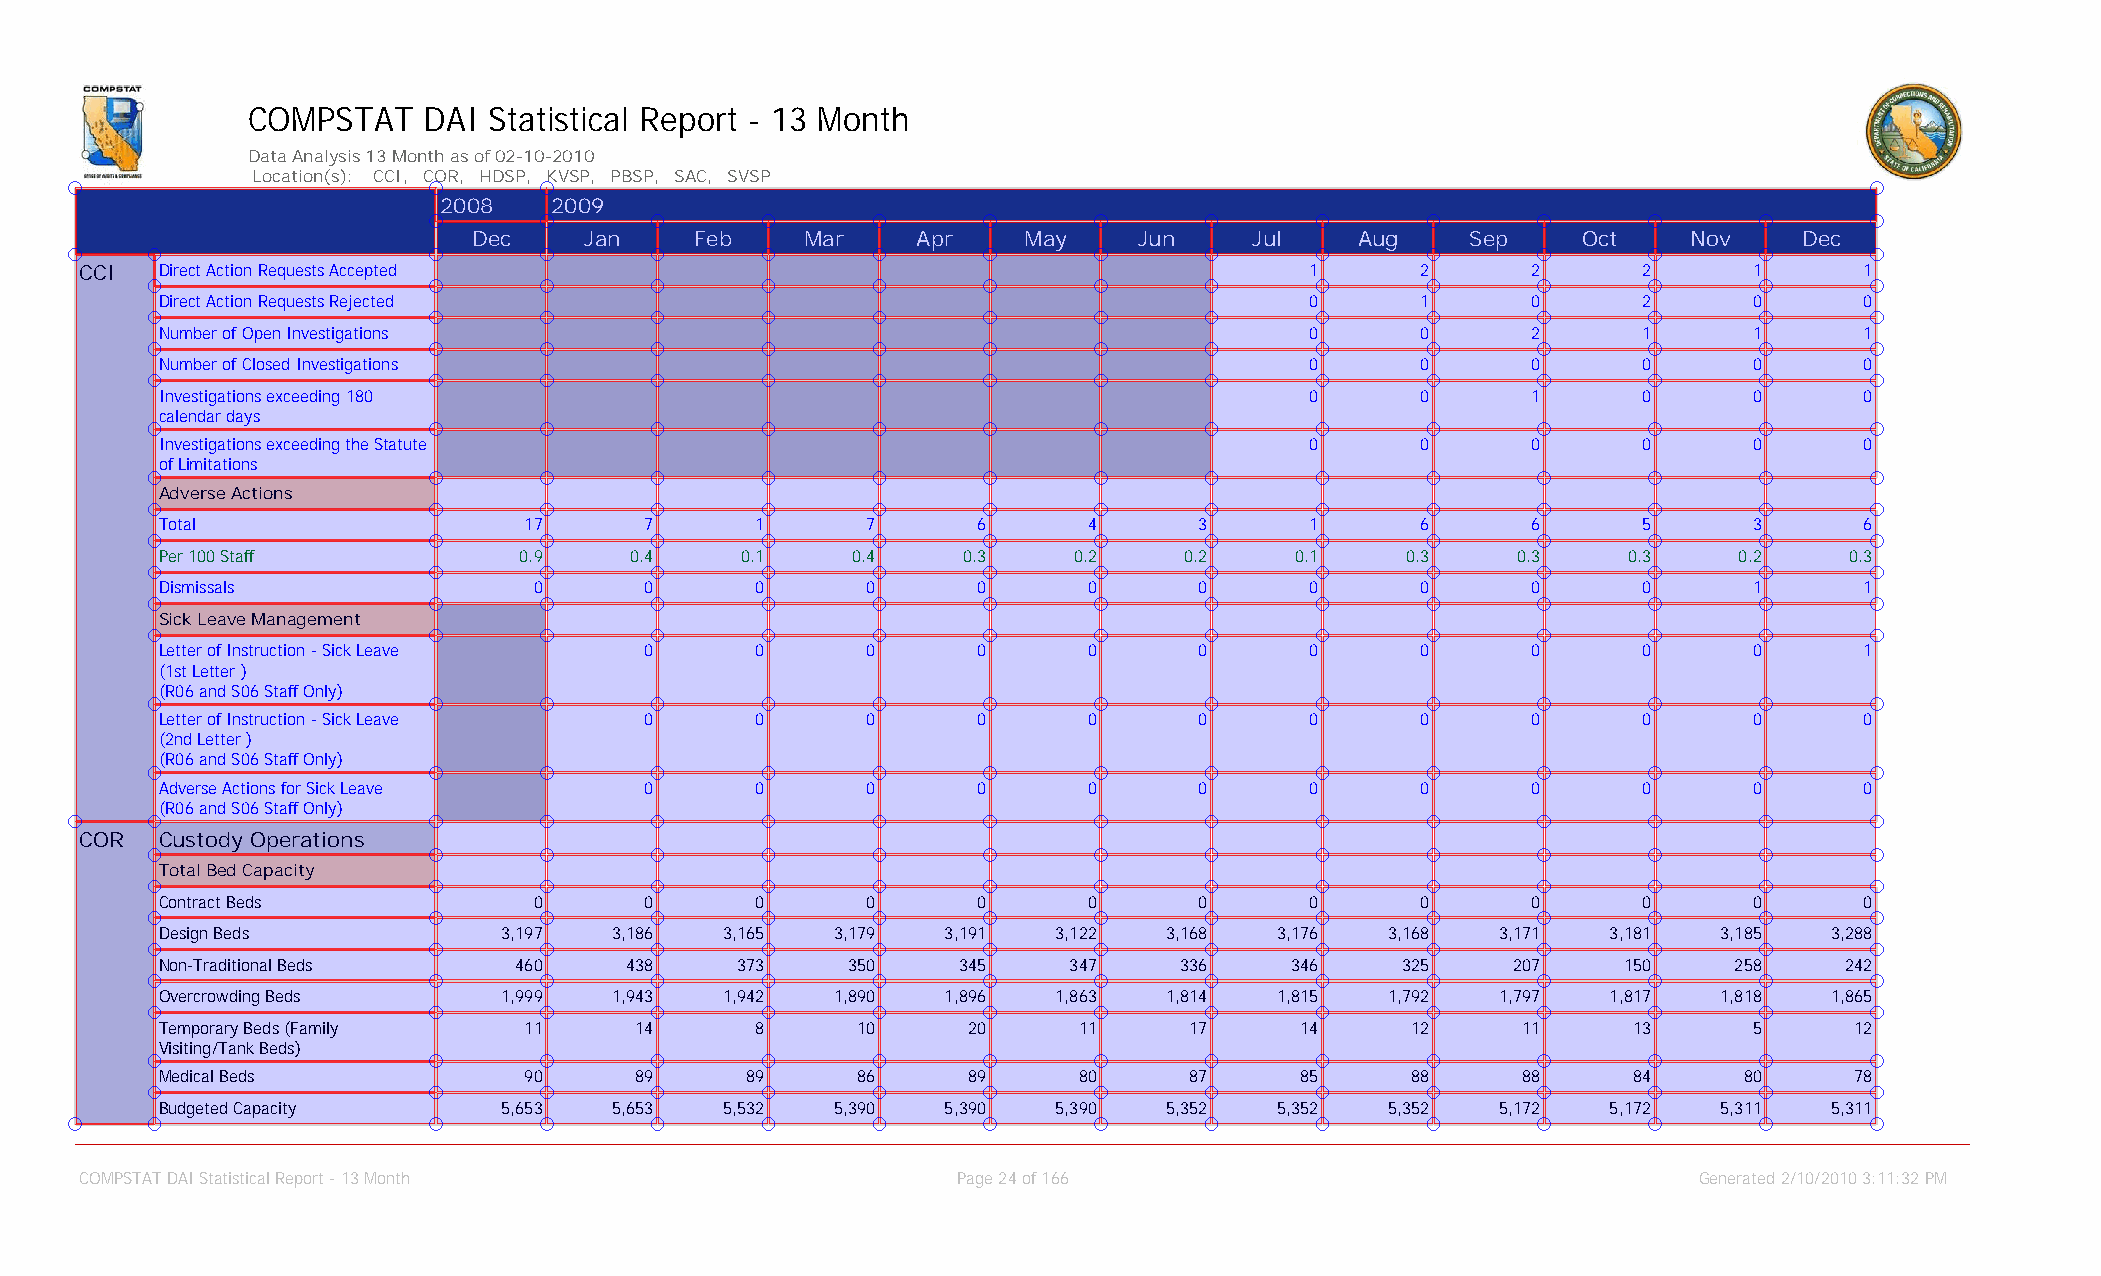

In [2]:
#Try one sample to check table finder from PDFPlumber https://github.com/jsvine/pdfplumber
pdf_name = "pdfs-2009-to-2014/2009_12_DAI_High_Security.pdf"

pdf  = pdfplumber.open(pdf_name)
page = pdf.pages[23]
image = page.to_image(resolution=150)
image.reset().debug_tablefinder()

In [9]:
# We include reception centers only because currently CDCR judges LAC as a high security prison and is 
# only in the reception centers PDFs. So we scrape those too, but we're only interested in LAC from those.

pdf_files = sorted((f for f in os.listdir("pdfs-2009-to-2014") if not f.startswith(".")), key=str.lower)

# DataFrame to hold everything
df = pd.DataFrame()

# Remove comma separators and carriage returns
def parse_value(txt):
    return txt.replace(",", "").replace('\n',' ')


for pdf_file in pdf_files:
    
    pdf = pdfplumber.open("pdfs-2009-to-2014/" + pdf_file)

    row_header = '' #some rows are headers for the following rows
    current_institution = '' #some institutions change mid-page

    for page in pdf.pages:
        
        table = page.extract_table()

        if table is not None:
            for row in table[2:]:
                if row[0] is not None:
                    current_institution = row[0]
                row_builder = { 'Institution':current_institution, 'Year': table[0][3], 'Category': row_header + parse_value(row[1]) }
                for i, month in enumerate(table[1][3:]):
                    row_builder[month] = parse_value(row[i + 3])
                if all(val=='' for val in row[2:]):
                    row_header = row[1] + ' - ' #if all values are empty, make row header category for next
                df = pd.concat([df, pd.DataFrame([row_builder])], ignore_index=True)
                
df
        

Institution  Year                                           Category  \
0             CAL  2009                                 Custody Operations   
1             CAL  2009            Custody Operations - Total Bed Capacity   
2             CAL  2009                 Total Bed Capacity - Contract Beds   
3             CAL  2009                   Total Bed Capacity - Design Beds   
4             CAL  2009          Total Bed Capacity - Non-Traditional Beds   
...           ...   ...                                                ...   
54282         CAC  2014  Adverse Actions Total (Non-Medical) - Per 100 ...   
54283         CAC  2014  Adverse Actions Total (Non-Medical) - Dismissa...   
54284         CAC  2014  Dismissals (Non-Medical) - Adverse Actions Tot...   
54285         CAC  2014    Adverse Actions Total (Medical) - Per 100 Staff   
54286         CAC  2014  Adverse Actions Total (Medical) - Dismissals (...   

        Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
0                                                                              
1                                                                              
2         0     0     0     0     0     0     0     0     0     0     0     0  
3      2223  2238  2230  2180  2196  2225  2202  2231  2226  2241  2238  2223  
4         0     0     0     0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
54282  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
54283                                                                          
54284                                                                          
54285  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
54286                                                                          

[54287 rows x 15 columns]

In [10]:
df_filtered = df.loc[(df['Category'] == 'Total Bed Capacity - Inmate Count') | (df['Category'] == 'Number of Incidents - Total Number of Documented Force')].reset_index(drop=True)
df_filtered.head(20)

Institution  Year                                           Category   Jan  \
0          CAL  2009                  Total Bed Capacity - Inmate Count  4272   
1          CAL  2009  Number of Incidents - Total Number of Document...    26   
2          CEN  2009                  Total Bed Capacity - Inmate Count  4834   
3          CEN  2009  Number of Incidents - Total Number of Document...    13   
4          CMC  2009                  Total Bed Capacity - Inmate Count  6605   
5          CMC  2009  Number of Incidents - Total Number of Document...     7   
6          CMF  2009                  Total Bed Capacity - Inmate Count  2831   
7          CMF  2009  Number of Incidents - Total Number of Document...    19   
8         MCSP  2009                  Total Bed Capacity - Inmate Count  3880   
9         MCSP  2009  Number of Incidents - Total Number of Document...    19   
10        PVSP  2009                  Total Bed Capacity - Inmate Count  5219   
11        PVSP  2009  Number of Incidents - Total Number of Document...    19   
12        SATF  2009                  Total Bed Capacity - Inmate Count  7018   
13        SATF  2009  Number of Incidents - Total Number of Document...    21   
14         CCI  2009                  Total Bed Capacity - Inmate Count  5703   
15         CCI  2009  Number of Incidents - Total Number of Document...    12   
16         COR  2009                  Total Bed Capacity - Inmate Count  5654   
17         COR  2009  Number of Incidents - Total Number of Document...    21   
18        HDSP  2009                  Total Bed Capacity - Inmate Count  4415   
19        HDSP  2009  Number of Incidents - Total Number of Document...    30   

     Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
0   4263  4252  4196  4198  4274  4255  4288  4303  4310  4309  4298  
1     21    15    23    16    28    21    21    26    18    26    28  
2   4690  4799  4665  4688  4491  4522  4520  4606  4623  4634  4704  
3     11    11    22    19     9    11    12    17    18    20    16  
4   6569  6532  6496  6516  6465  6441  6514  6646  6665  6695  6692  
5     12    14    19    14     8    16     9    14    12    17    10  
6   2783  2805  2806  2843  2796  2712  2719  2841  2948  2902  2850  
7     14    10    16    12    20     6     8    19    23    12    16  
8   3869  3817  3812  3857  3820  3739  3747  3769  3752  3769  3800  
9     17    10    13    18     9    12    14     9    12    20    10  
10  5214  5166  4947  5001  4989  4959  5012  4993  4985  4909  4909  
11    27    23    17    16    14    14    22    17    18    15    21  
12  6964  7021  7045  6961  7027  6911  6910  6905  6953  6913  6918  
13    24    11    14    17    14    23    12    23    16    17     5  
14  5562  5259  5235  5226  5354  5559  5783  5741  5962  5888  5907  
15    24    28    21    22    20    24    18    26    21    18    19  
16  5562  5505  5525  5413  5409  5426  5367  5264  5235  5332  5478  
17    20    21    18    14    15    20    17    21    21    18    25  
18  4424  4451  4459  4493  4404  4457  4462  4496  4472  4469  4486  
19    33    39    27    40    32    25    30    26    28    32    33

In [11]:
#convert to long format
df_melted = df_filtered.melt(id_vars=['Institution','Year','Category'], var_name='Month', value_name='Value')
df_melted.head()

Institution  Year                                           Category Month  \
0         CAL  2009                  Total Bed Capacity - Inmate Count   Jan   
1         CAL  2009  Number of Incidents - Total Number of Document...   Jan   
2         CEN  2009                  Total Bed Capacity - Inmate Count   Jan   
3         CEN  2009  Number of Incidents - Total Number of Document...   Jan   
4         CMC  2009                  Total Bed Capacity - Inmate Count   Jan   

  Value  
0  4272  
1    26  
2  4834  
3    13  
4  6605

In [12]:
df_UOF = df_melted[df_melted['Category'] == 'Number of Incidents - Total Number of Documented Force']
df_POP = df_melted[df_melted['Category'] == 'Total Bed Capacity - Inmate Count']

df_combined = df_UOF.merge(df_POP, how='inner', on=['Institution','Year','Month'])
df_combined.head()

Institution  Year                                         Category_x Month  \
0         CAL  2009  Number of Incidents - Total Number of Document...   Jan   
1         CEN  2009  Number of Incidents - Total Number of Document...   Jan   
2         CMC  2009  Number of Incidents - Total Number of Document...   Jan   
3         CMF  2009  Number of Incidents - Total Number of Document...   Jan   
4        MCSP  2009  Number of Incidents - Total Number of Document...   Jan   

  Value_x                         Category_y Value_y  
0      26  Total Bed Capacity - Inmate Count    4272  
1      13  Total Bed Capacity - Inmate Count    4834  
2       7  Total Bed Capacity - Inmate Count    6605  
3      19  Total Bed Capacity - Inmate Count    2831  
4      19  Total Bed Capacity - Inmate Count    3880

In [13]:
df_finished = df_combined.drop(['Category_x','Category_y'], axis=1).rename(columns={'Value_x':'Use of Force', 'Value_y': 'Inmate Count'})
df_finished.head(10)

Institution  Year Month Use of Force Inmate Count
0         CAL  2009   Jan           26         4272
1         CEN  2009   Jan           13         4834
2         CMC  2009   Jan            7         6605
3         CMF  2009   Jan           19         2831
4        MCSP  2009   Jan           19         3880
5        PVSP  2009   Jan           19         5219
6        SATF  2009   Jan           21         7018
7         CCI  2009   Jan           12         5703
8         COR  2009   Jan           21         5654
9        HDSP  2009   Jan           30         4415

In [14]:
df_finished.to_csv("finished-csvs/finished-2009-2014.csv", encoding="utf-8", index=False)